In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)

In [3]:
train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-24,1739.800049,1772.000000,1712.599976,1727.349976,1720.889404,1358724
2020-06-25,1729.000000,1749.000000,1713.849976,1717.949951,1711.524536,654657
2020-06-26,1730.349976,1751.500000,1717.199951,1742.599976,1736.082397,1385178
2020-06-29,1728.000000,1738.900024,1715.000000,1723.150024,1716.705200,670107
2020-06-30,1736.300049,1740.699951,1696.000000,1703.349976,1696.979248,992945


In [4]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-02,1750.000000,1766.800049,1734.400024,1760.550049,1760.550049,815775
2020-07-03,1781.050049,1792.800049,1768.500000,1787.500000,1787.500000,857283
2020-07-06,1801.150024,1858.000000,1792.000000,1851.400024,1851.400024,949421
2020-07-07,1870.000000,1870.000000,1806.400024,1823.949951,1823.949951,717717
2020-07-08,1826.000000,1834.800049,1790.099976,1797.349976,1797.349976,583648


In [5]:
test.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-09,2058.699951,2070.000000,2038.900024,2050.300049,2050.300049,843691
2020-11-10,2075.000000,2090.000000,2041.800049,2084.500000,2084.500000,1068647
2020-11-11,2092.000000,2095.350098,1979.000000,1996.900024,1996.900024,811189
2020-11-12,1985.000000,2008.349976,1965.000000,1979.849976,1979.849976,711464
2020-11-13,1990.000000,2036.650024,1981.000000,1996.099976,1996.099976,1825121


In [6]:
arima_total=pd.concat((train,test),axis=0)

# ARIMA

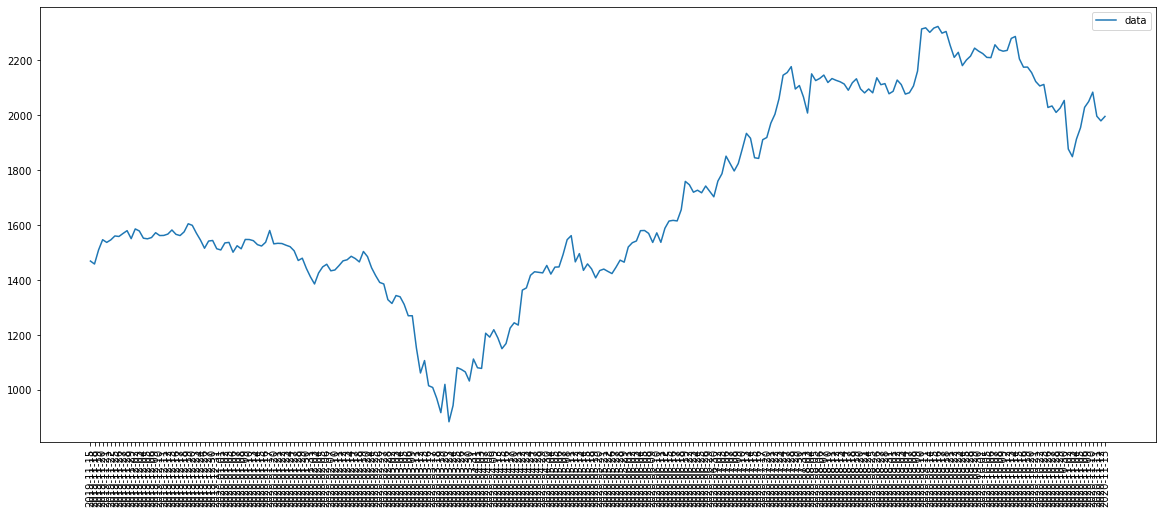

In [7]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(arima_total['Close'],label='data')
ax.set_xticklabels(arima_total.index,rotation=90)
plt.legend()
plt.show()

<ipython-input-8-d0fb6aa3760c>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposistion=seasonal_decompose(arima_total['Close'],freq=2)


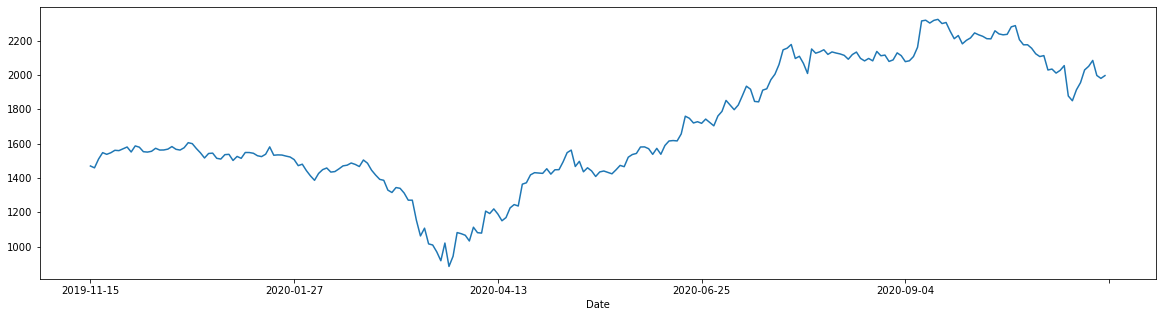

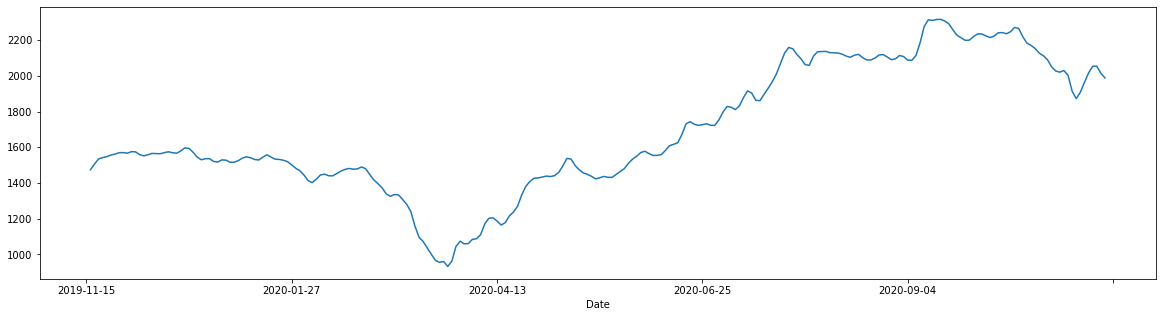

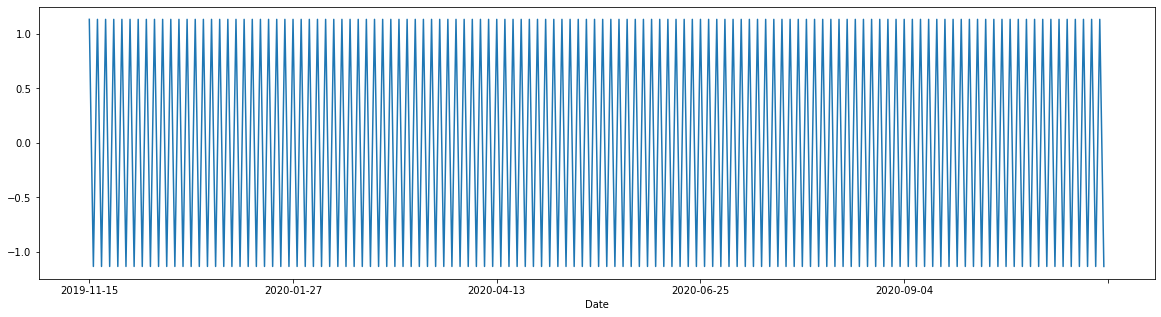

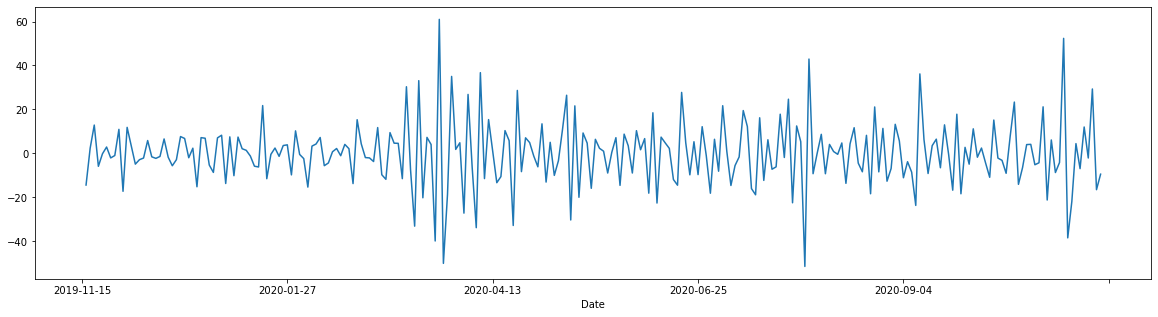

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(arima_total['Close'],freq=2)
trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid

arima_total['Close'].plot(figsize=(20,5))
plt.show()
trend.plot(figsize=(20,5))
plt.show()
seasonal.plot(figsize=(20,5))
plt.show()
residual.plot(figsize=(20,5))
plt.show()

In [9]:
# Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [10]:
# H0 : It is Not Stationary
# H1: It is Stationary
# Pvalue <= 0.05 : Reject the Null Hypothesis - Time series is Stationary
# Pvalue > 0.05 : Failed to reject the Null Hypothesis - Time Series is not Stationary
# ADf Statistics < critical value : Reject the Null Hypothesis
# ADf Statistics > critical value : Failed to Reject the Null Hypothesis

def adfuller_test(data):
    result=adfuller(data)
    labels=['ADF test statistics','P-Value','#Lag used','Number of Observation used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    print('=================================================================================')
    if result[1]<=0.05:
        print('Reject the Null Hypothesis - Time series is Stationary')
    else:
        print('Failed to reject the Null Hypothesis - Time Series is not Stationary')
    print('=================================================================================')
    for key,value in result[4].items():
        print('Critical Values:')
        print(f'   {key} , {value}')
        

In [11]:
adfuller_test(arima_total['Close'])

ADF test statistics:-0.8837515889826133
P-Value:0.7932761498457488
#Lag used:7
Number of Observation used:242
Failed to reject the Null Hypothesis - Time Series is not Stationary
Critical Values:
   1% , -3.457664132155201
Critical Values:
   5% , -2.8735585105960224
Critical Values:
   10% , -2.5731749894132916


In [12]:
arima_total['stock 1st diff']=arima_total['Close']-arima_total['Close'].shift(2)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

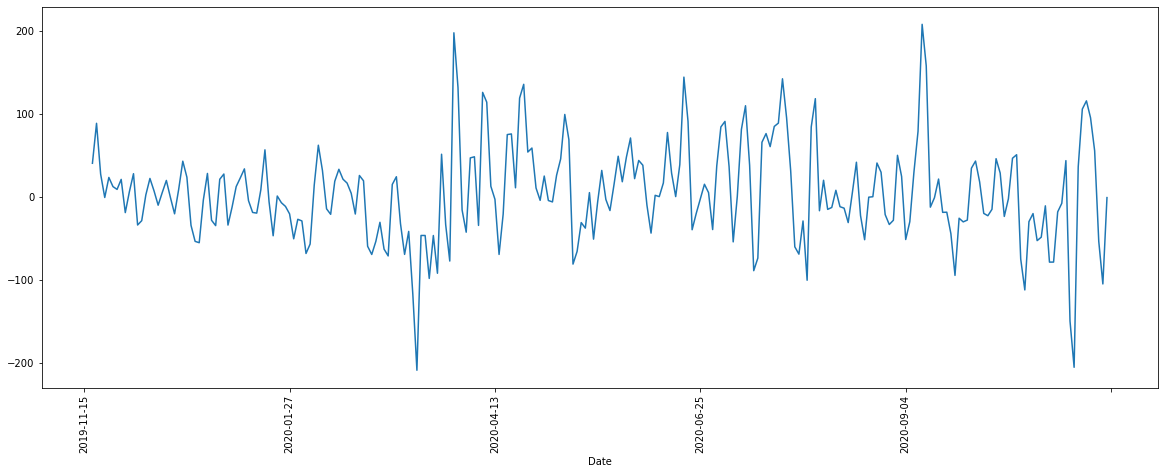

In [13]:
arima_total['stock 1st diff'].plot(figsize=(20,7))
plt.xticks(rotation='vertical')

In [14]:
adfuller_test(arima_total['stock 1st diff'].dropna())

ADF test statistics:-3.408939931961062
P-Value:0.010657859175058232
#Lag used:15
Number of Observation used:232
Reject the Null Hypothesis - Time series is Stationary
Critical Values:
   1% , -3.458854867412691
Critical Values:
   5% , -2.8740800599399323
Critical Values:
   10% , -2.573453223097503


F:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


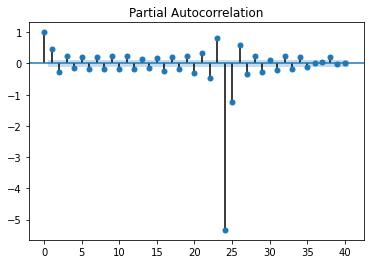

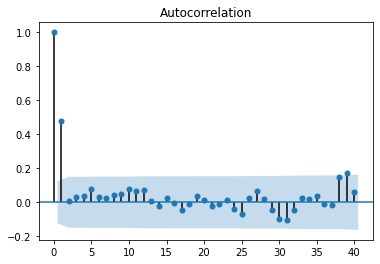

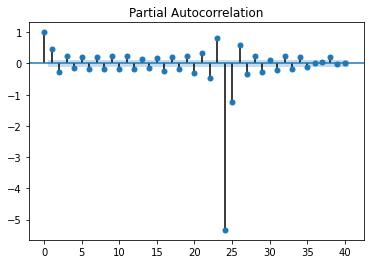

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(arima_total['stock 1st diff'].dropna(),lags=40)
plot_pacf(arima_total['stock 1st diff'].dropna(),lags=40)

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
model=ARIMA(arima_total['Close'],order=(1,0,0))
model_fit=model.fit()

F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  250
Model:                     ARMA(1, 0)   Log Likelihood               -1289.064
Method:                       css-mle   S.D. of innovations             41.639
Date:                Wed, 18 Nov 2020   AIC                           2584.128
Time:                        20:39:19   BIC                           2594.693
Sample:                             0   HQIC                          2588.380
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1711.9236    234.522      7.300      0.000    1252.268    2171.579
ar.L1.Close     0.9921      0.006    161.225      0.000       0.980       1.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0080           +0.0000j            1.0080            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
predictions=pd.Series(model_fit.fittedvalues,copy=True)
predictions

Date
2019-11-15    1711.923612
2019-11-18    1471.228294
2019-11-19    1460.514078
2019-11-20    1511.406421
2019-11-21    1548.360378
                 ...     
2020-11-09    2026.480043
2020-11-10    2047.610810
2020-11-11    2081.538958
2020-11-12    1994.635181
2020-11-13    1977.720638
Length: 250, dtype: float64

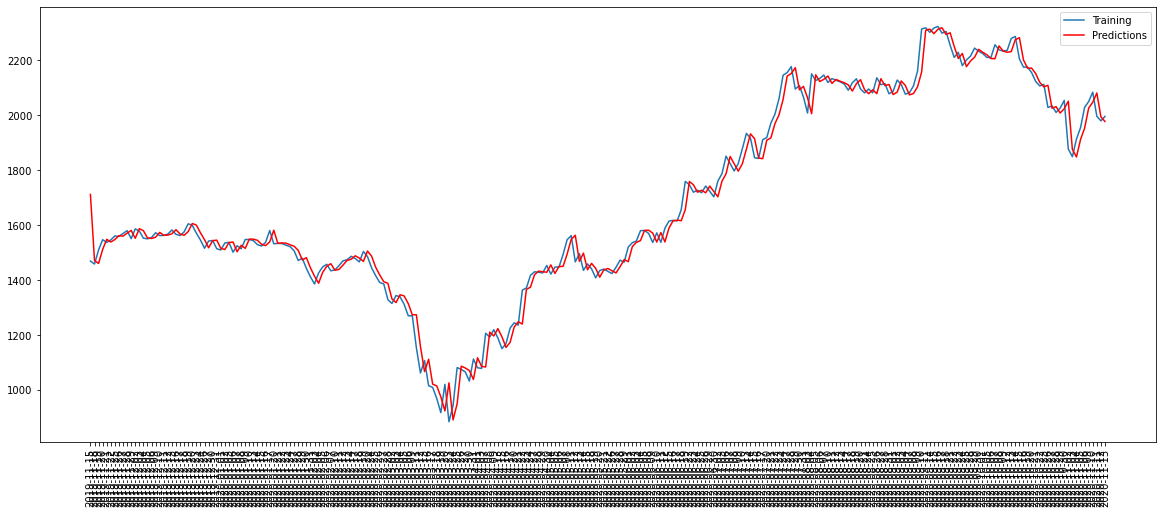

In [20]:
plt.figure(figsize=(20,8))
plt.plot(arima_total['Close'],label='Training')
plt.plot(predictions,color='red',label='Predictions')
plt.xticks(rotation='vertical')
plt.legend()

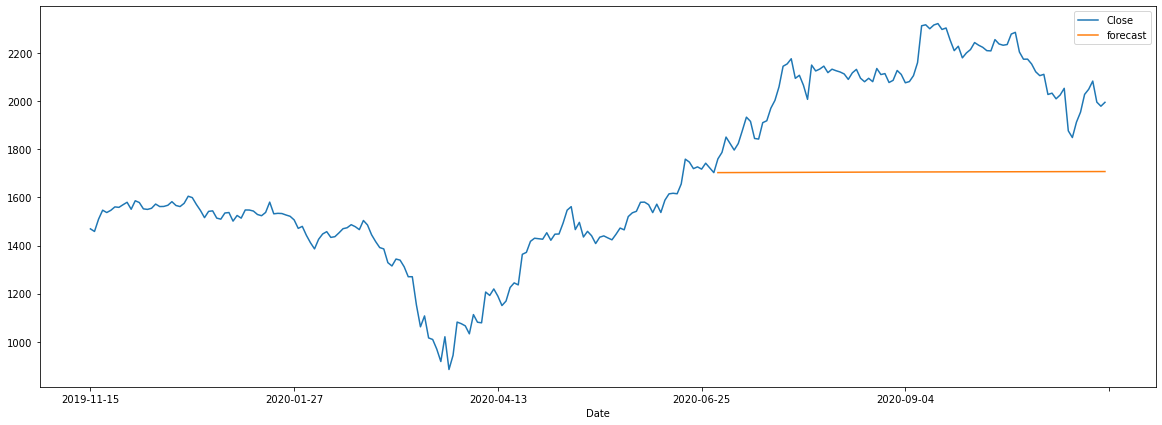

In [21]:
arima_total['forecast']=model_fit.predict(start='2020-07-02',end='2020-11-13',dynamic=True)
arima_total[['Close','forecast']].plot(figsize=(20,7))

In [58]:
train.shape

(154, 6)

In [59]:
total.shape

(250, 6)

F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


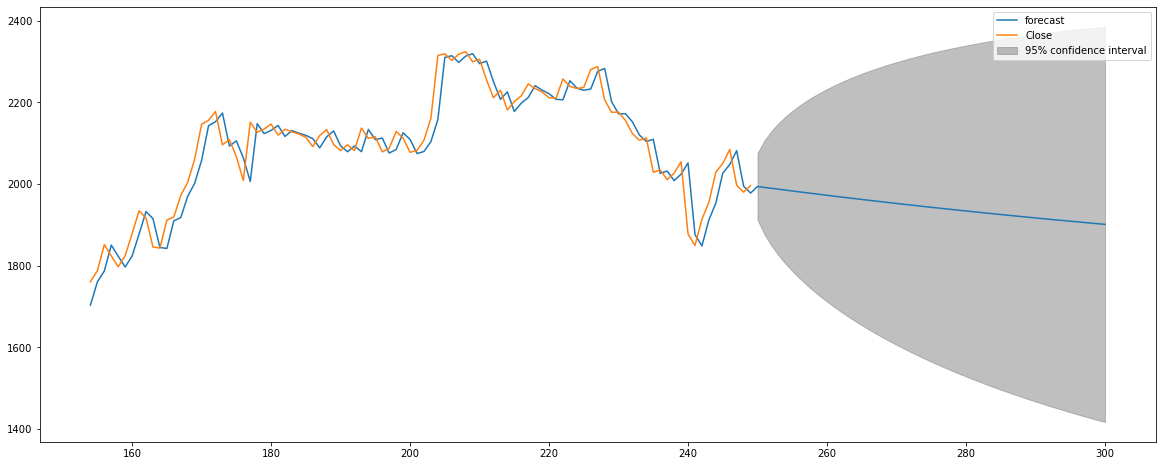

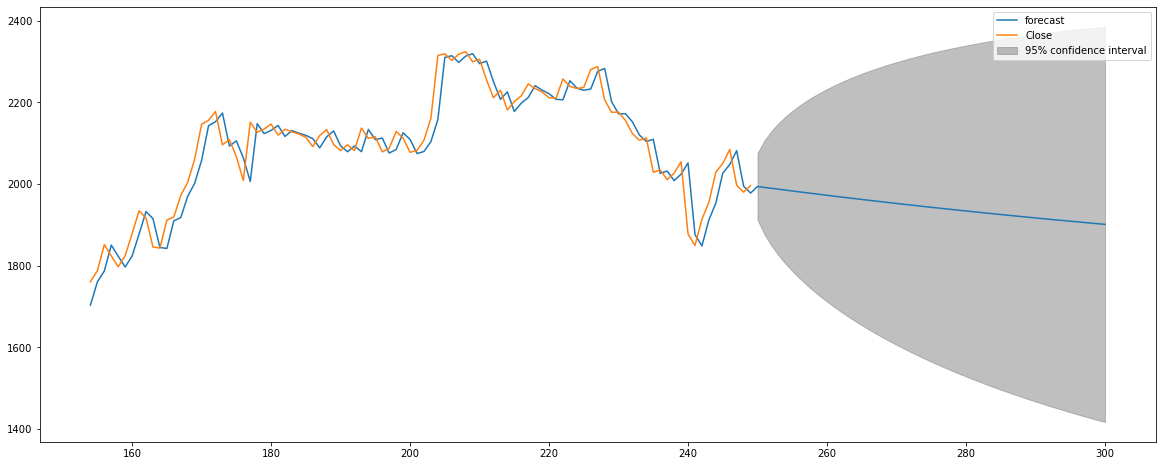

In [61]:
fig,ax=plt.subplots(figsize=(20,8))
model_fit.plot_predict(154,300,ax=ax)

# LSTM

In [23]:
training_set=train['Close'].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scale=scaler.fit_transform(training_set.reshape(-1,1))

## Part 1 : Preprocessing
### Creating Data Structure with 60 timestep and 1 output


In [25]:
train_scale.shape

(154, 1)

In [26]:
x_train=[]
y_train=[]
for i in range(60,train_scale.shape[0]):
    x_train.append(train_scale[i-60:i,0])
    y_train.append(train_scale[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [27]:
x_train

array([[0.66858911, 0.65625536, 0.71484047, ..., 0.64432143, 0.65528468,
        0.62799065],
       [0.65625536, 0.71484047, 0.75738029, ..., 0.65528468, 0.62799065,
        0.63141667],
       [0.71484047, 0.75738029, 0.74618855, ..., 0.62799065, 0.63141667,
        0.64951748],
       ...,
       [0.2180095 , 0.20744592, 0.1695883 , ..., 0.95494781, 0.96328439,
        0.95254948],
       [0.20744592, 0.1695883 , 0.26106317, ..., 0.96328439, 0.95254948,
        0.98070002],
       [0.1695883 , 0.26106317, 0.22474738, ..., 0.95254948, 0.98070002,
        0.95848801]])

### Reshaping The Data

In [28]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## Part 2 : Modelling

### Importing the Libraries

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

### Generating Recurrent Neural Network

In [30]:
rnn=Sequential()
rnn.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
rnn.add(Dropout(0.2))

In [31]:
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))

In [32]:
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))

In [33]:
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.2))

In [34]:
rnn.add(LSTM(units=50))
rnn.add(Dropout(0.2))

In [35]:
rnn.add(Dense(units=1))

In [36]:
rnn.compile(optimizer='adam',loss='mean_squared_error')

In [37]:
history=rnn.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 242ms/step - loss: 0.3394
Epoch 2/100
3/3 [==============================] - 1s 229ms/step - loss: 0.1485
Epoch 3/100
3/3 [==============================] - 1s 227ms/step - loss: 0.1160
Epoch 4/100
3/3 [==============================] - 1s 229ms/step - loss: 0.0677
Epoch 5/100
3/3 [==============================] - 1s 225ms/step - loss: 0.0747
Epoch 6/100
3/3 [==============================] - 1s 229ms/step - loss: 0.0646
Epoch 7/100
3/3 [==============================] - 1s 226ms/step - loss: 0.0635
Epoch 8/100
3/3 [==============================] - 1s 227ms/step - loss: 0.0649
Epoch 9/100
3/3 [==============================] - 1s 227ms/step - loss: 0.0598
Epoch 10/100
3/3 [==============================] - 1s 221ms/step - loss: 0.0590
Epoch 11/100
3/3 [==============================] - 1s 222ms/step - loss: 0.0663
Epoch 12/100
3/3 [==============================] - 1s 225ms/step - loss: 0.0604
Epoch 13/100
3/3 [===================

## Preparing Test Dataset for tesing

In [38]:
total=pd.concat((train,test),axis=0)

In [45]:
inputs=total[total.shape[0]-test.shape[0]-60:]
inputs=inputs['Close'].values
inputs=scaler.transform(inputs.reshape(-1,1))

In [46]:
inputs.shape

(156, 1)

In [47]:
x_test=[]
for i in range(60,156):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test) 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    

In [48]:
unscale_pred=rnn.predict(x_test)

In [49]:
predictions_rnn=scaler.inverse_transform(unscale_pred)

In [50]:
from statsmodels.tools.eval_measures import rmse

In [51]:
err_arima=rmse(test['Close'],arima_total['forecast'].dropna())

In [52]:
predictions_rnn_1=[]
for i in range(96):
    predictions_rnn_1.append(predictions_rnn[i][0])


In [53]:
err_lstm=rmse(test['Close'].values,predictions_rnn_1)

In [54]:
print(f'RMSE with ARIMA : {err_arima}')
print(f'RMSE with LSTM : {err_lstm}')

RMSE with ARIMA : 411.24524333561976
RMSE with LSTM : 100.36483243663767


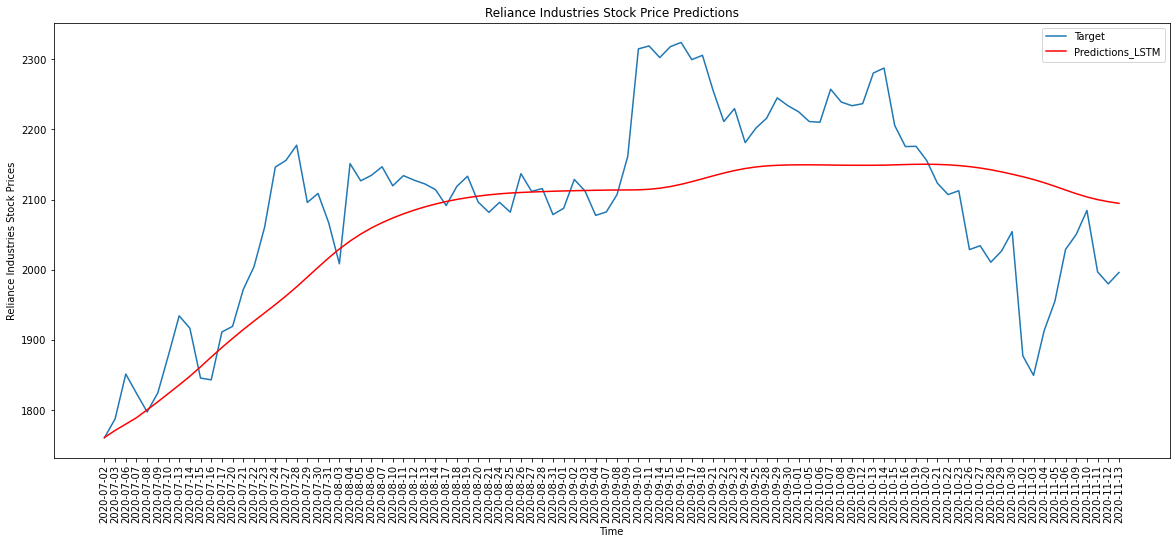

In [62]:
plt.figure(figsize=(20,8))
plt.plot(test['Close'],label='Target')
plt.plot(predictions_rnn_1,color='red',label='Predictions_LSTM')
plt.xlabel('Time')
plt.ylabel('Reliance Industries Stock Prices')
plt.xticks(rotation='vertical')
plt.title('Reliance Industries Stock Price Predictions')
plt.legend()